<a href="https://colab.research.google.com/github/Vanitha-Jain/capstone/blob/Model-building/Bagging_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, mean_absolute_error, cohen_kappa_score, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import pandas as pd

In [ ]:
np.random.seed(42)
random.seed(42)

In [ ]:
df=pd.read_csv('/content/combined_dataset_FS2.csv')
df

,Unnamed: 0,APC2D1_C_N,APC2D1_C_O,APC2D2_N_O,APC2D3_C_N,APC2D4_C_X,APC2D5_N_X,APC2D5_O_F,APC2D7_N_O,APC2D7_O_O,APC2D8_N_N,APC2D8_N_O,APC2D9_C_F,APC2D9_C_X,APC2D9_N_O,APC2D9_O_O,class,FP135,FP239,FP283,FP296,FP405,FP411,FP495,FP512,FP592,FP688,FP756,FP763,FP770,FP787,FP888,MACCSFP37,MACCSFP52,MACCSFP75,MACCSFP86,MACCSFP89,MACCSFP91,MACCSFP93,MACCSFP96,MACCSFP108,MACCSFP126,MACCSFP129,MACCSFP135,MACCSFP138,MACCSFP140,MACCSFP156,ExtFP51,ExtFP86,ExtFP102,...,KRFPC3779,KRFPC3786,KRFPC3921,KRFPC4269,KRFPC4752,FP_249,FP_361,FP_650,FP_699,FP_781,FP_841,FP_875,FP_935,FP_980,FP_1060,FP_1224,FP_1236,FP_1480,FP_1535,FP_1816,SubFP2,SubFP3,SubFP5,SubFP12,SubFP16,SubFP18,SubFP23,SubFP26,SubFP88,SubFP100,SubFP171,SubFP180,SubFP181,SubFP287,SubFP303,AD2D13,AD2D25,AD2D180,AD2D248,AD2D326,AD2D336,AD2D404,AD2D414,AD2D482,AD2D492,AD2D559,AD2D560,AD2D569,AD2D570,AD2D704
0,0,1,3,2,4,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
1,1,1,2,2,4,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
2,2,1,2,2,4,2,0,0,0,0,0,0,0,2,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
3,3,1,2,2,4,2,0,0,0,0,0,0,0,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
4,4,1,2,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,1224,3,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1225,1225,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1226,1226,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1227,1227,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df = df.drop('Unnamed: 0', axis=1)
X = df.drop(["class"], axis=1)
Y = df["class"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

In [ ]:
bagging = BaggingClassifier(n_estimators=100, random_state=42)
bagging.fit(X_train, Y_train)

BaggingClassifier(n_estimators=100, random_state=42)

In [ ]:
y_pred = bagging.predict(X_test)
y_pred_proba = bagging.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation Metrics
accuracy = accuracy_score(Y_test, y_pred)
auc_score = roc_auc_score(Y_test, y_pred_proba)
clf_report = classification_report(Y_test, y_pred)

In [ ]:
# Confusion Matrix
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
mae = mean_absolute_error(Y_test, y_pred)
kappa = cohen_kappa_score(Y_test, y_pred)

In [ ]:
# Print Results
print("BaggingClassifier Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc_score:.4f}")
print(f"Classification Report:\n{clf_report}")
print(f"\nSensitivity (Recall): {sensitivity:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Cohen's Kappa Score: {kappa:.4f}")

BaggingClassifier Evaluation Metrics:
Accuracy: 0.8238
AUC: 0.8969
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       230
           1       0.80      0.71      0.75       139

    accuracy                           0.82       369
   macro avg       0.82      0.80      0.81       369
weighted avg       0.82      0.82      0.82       369


Confusion Matrix:
[[206  24]
 [ 41  98]]

Sensitivity (Recall): 0.7050
Mean Absolute Error (MAE): 0.1762
Cohen's Kappa Score: 0.6156


In [ ]:
# ROC Curve Plot
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

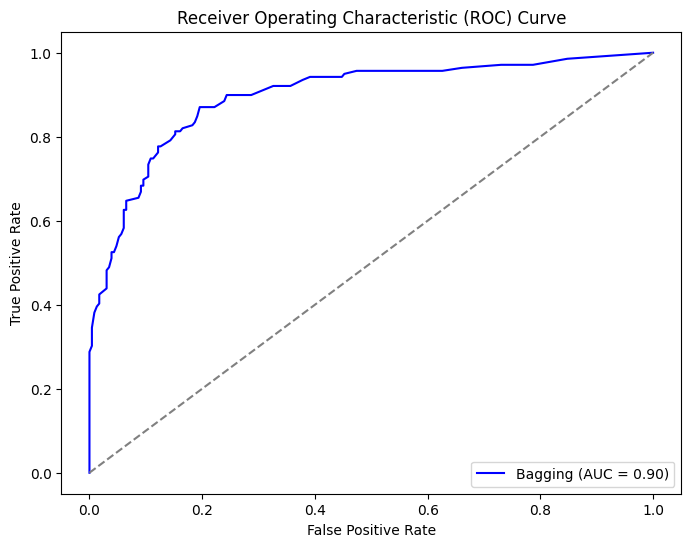

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Bagging (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Bar Plot for Sensitivity, MAE, and Kappa Score
metrics = ["Sensitivity (Recall)", "Mean Absolute Error", "Cohen's Kappa Score"]
values = [sensitivity, mae, kappa]

<ipython-input-15-1fba41cc3a0b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="viridis")


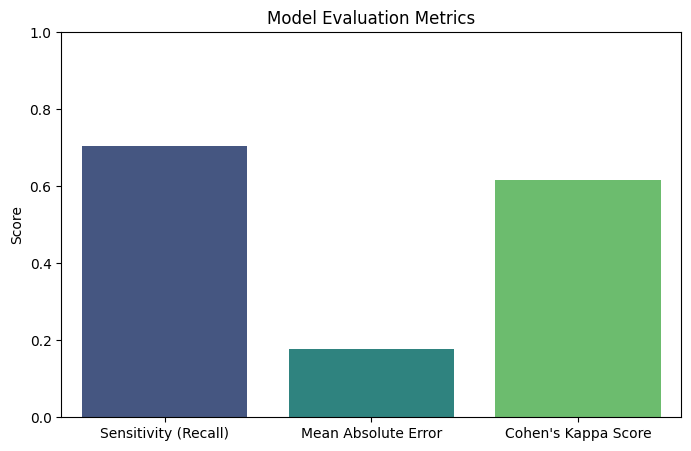

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette="viridis")
plt.ylabel("Score")
plt.title("Model Evaluation Metrics")
plt.ylim(0, 1)  # Metrics are between 0 and 1
plt.show()